Установка библиотеки

In [ ]:
!pip install blocksnet ipykernel -q

In [ ]:
import geopandas as gpd

boundary = gpd.read_file('priozersk.geojson')

In [ ]:
import osmnx as ox

<Axes: >

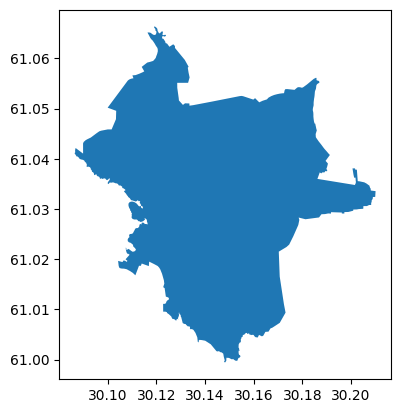

In [ ]:
boundary.plot()

Возможно, необходимо будет добавить какие-то теги непосредственно для вашей территории. Логика следующая:
- `water` - полигональные объекты полностью удаляются из геометрии города, линейные служат потенциальными границами будущих кварталов.
- `roads`, `railways` - служат потенциальными границами будущих кварталов.

In [ ]:
tags = {
    'roads': {
      "highway": ["construction","crossing","living_street","motorway","motorway_link","motorway_junction","pedestrian","primary","primary_link","raceway","residential","road","secondary","secondary_link","services","tertiary","tertiary_link","track","trunk","trunk_link","turning_circle","turning_loop","unclassified",],
      "service": ["living_street", "emergency_access"]
    },
    'railways': {
      "railway": "rail"
    },
    'water': {
      'riverbank':True,
      'reservoir':True,
      'basin':True,
      'dock':True,
      'canal':True,
      'pond':True,
      'natural':['water','bay'],
      'waterway':['river','canal','ditch'],
      'landuse':'basin',
      'water': 'lake'
    }
}

In [ ]:
water = ox.features_from_polygon(boundary.unary_union, tags['water'])
roads = ox.features_from_polygon(boundary.unary_union, tags['roads'])
railways = ox.features_from_polygon(boundary.unary_union, tags['railways'])

Определяем локальную CRS для города в метрах, к ней будем приводить все имеющиеся геометрии (и, соответственно, получать слой кварталов).

In [ ]:
local_crs = boundary.estimate_utm_crs()

In [ ]:
local_crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
boundary = boundary.reset_index()[['geometry']].to_crs(local_crs)
water = water.reset_index()[['geometry']].to_crs(local_crs)
roads = roads.reset_index()[['geometry']].to_crs(local_crs)
railways = railways.reset_index()[['geometry']].to_crs(local_crs)

In [ ]:
roads = roads[roads.geom_type.isin(['LineString', 'MultiLineString'])]

Импортируем класс `BlocksGenerator` и инициализируем его экземпляр с помощью наших геометрий. На этапе инициализации:
- все геометрии проверяются по спецификации (можете увидеть при наведении курсора на BlocksGenerator);
- из геометрии границ территории удаляются полигоны водных объектов.

In [ ]:
from blocksnet import BlocksGenerator

bg = BlocksGenerator(boundary, roads, railways, water)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

2024-12-27 18:57:50.023 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:99 - Check boundaries schema
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._

In [ ]:
blocks = bg.run()

2024-12-27 18:58:08.287 | INFO     | blocksnet.preprocessing.blocks_generator:run:161 - Generating blocks
2024-12-27 18:58:08.355 | INFO     | blocksnet.preprocessing.blocks_generator:run:170 - Setting up enclosures
2024-12-27 18:58:10.488 | INFO     | blocksnet.preprocessing.blocks_generator:run:174 - Filling holes
2024-12-27 18:58:10.550 | INFO     | blocksnet.preprocessing.blocks_generator:run:178 - Dropping overlapping blocks
2024-12-27 18:58:10.676 | INFO     | blocksnet.preprocessing.blocks_generator:run:192 - Calculating blocks area
2024-12-27 18:58:10.689 | INFO     | blocksnet.preprocessing.blocks_generator:run:199 - Blocks generated


С помощью библиотеки mapclassify мы можем выводить геометрии на карту через `.explore()`.

In [ ]:
!pip install mapclassify -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.0 MB/s eta 0:00:00


In [ ]:
blocks.explore()

По желанию можно дорезать кварталы с помощью зданий. Не забываем временно перевести в EPSG:4326, ведь мы уже меняли CRS раньше. От них нам достаточно геометрий, поэтому забираем все.

In [ ]:
buildings = ox.features_from_polygon(boundary.to_crs(4326).unary_union, {'building': True})

In [ ]:
buildings

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


amenity brand contact:phone contact:website  \
element_type osmid                                                    
node         6398486913     NaN   NaN           NaN             NaN   
             6415977015     NaN   NaN           NaN             NaN   
             6415977821     NaN   NaN           NaN             NaN   
             6415978048     NaN   NaN           NaN             NaN   
             6415978050     NaN   NaN           NaN             NaN   
...                         ...   ...           ...             ...   
relation     17702428       NaN   NaN           NaN             NaN   
             17702431       NaN   NaN           NaN             NaN   
             17952163       NaN   NaN           NaN             NaN   
             17952168       NaN   NaN           NaN             NaN   
             18431277       NaN   NaN           NaN             NaN   

                                                             opening_hours  \
element_type osmid                                                           
node         6398486913  Mo, Fr 09:00-12:00; Tu, Th 09:00-12:00, 13:00-...   
             6415977015                                                NaN   
             6415977821                                                NaN   
             6415978048                                                NaN   
             6415978050                                                NaN   
...                                                                    ...   
relation     17702428                                                  NaN   
             17702431                                                  NaN   
             17952163                                                  NaN   
             17952168                                                  NaN   
             18431277                                                  NaN   

                        operator  \
element_type osmid                 
node         6398486913      NaN   
             6415977015      NaN   
             6415977821      NaN   
             6415978048      NaN   
             6415978050      NaN   
...                          ...   
relation     17702428        NaN   
             17702431        NaN   
             17952163        NaN   
             17952168        NaN   
             18431277        NaN   

                                                                  geometry  \
element_type osmid                                                           
node         6398486913                          POINT (30.11746 61.03869)   
             6415977015                          POINT (30.11986 61.04176)   
             6415977821                          POINT (30.11814 61.04172)   
             6415978048                          POINT (30.11728 61.04159)   
             6415978050                          POINT (30.11680 61.04155)   
...                                                                    ...   
relation     17702428    POLYGON ((30.13727 61.04159, 30.13712 61.04182...   
             17702431    POLYGON ((30.13994 61.04238, 30.13992 61.04241...   
             17952163    POLYGON ((30.11237 61.03798, 30.11231 61.03797...   
             17952168    POLYGON ((30.10203 61.03626, 30.10186 61.03632...   
             18431277    POLYGON ((30.11498 61.05219, 30.11493 61.05225...   

                         ref  name shop  ... name:fi location  \
element_type osmid                       ...                    
node         6398486913  NaN  ЕИРЦ  NaN  ...     NaN      NaN   
             6415977015  NaN   NaN  NaN  ...     NaN      NaN   
             6415977821  NaN   NaN  NaN  ...     NaN      NaN   
             6415978048  NaN   NaN  NaN  ...     NaN      NaN   
             6415978050  NaN   NaN  NaN  ...     NaN      NaN   
...                      ...   ...  ...  ...     ...      ...   
relation     17702428    NaN   NaN  NaN  ...     NaN      NaN   
             177

Переводим здания в нашу CRS и оставляем только столбец с геометрияaми. От них берем центроиды (`.representative_point()` - точка центра, которая точно будет лежать на полигоне).


In [ ]:
buildings = buildings.to_crs(local_crs).reset_index()[['geometry']]
buildings.geometry = buildings.representative_point()

In [ ]:
from blocksnet import BlocksSplitter

bs = BlocksSplitter(blocks, buildings)

Здесь можно поиграть со следующими параметрами кластеризации и выбора необходимых кварталов для нарезки:
- n_clusters : int
    Number of clusters to form within each block, default is 4.

- points_quantile : float
    Quantile value to filter blocks by the number of points, default is 0.98.

- area_quantile : float
    Quantile value to filter blocks by area, default is 0.95.

In [ ]:
splitted_blocks = bs.run()

2024-12-27 19:00:00.528 | INFO     | blocksnet.preprocessing.blocks_splitter:run:167 - Joining buildings and blocks to exclude duplicates
2024-12-27 19:00:00.633 | INFO     | blocksnet.preprocessing.blocks_splitter:run:176 - Choosing blocks to be splitted
2024-12-27 19:00:00.677 | INFO     | blocksnet.preprocessing.blocks_splitter:run:185 - Splitting filtered blocks
  0%|          | 0/3 [00:00<?, ?it/s]Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a72ae0b8700>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__

Как мы видим, кварталов стало побольше примерно на 200.

In [ ]:
len(blocks), len(splitted_blocks)

(247, 258)

Сравним же визуально :)

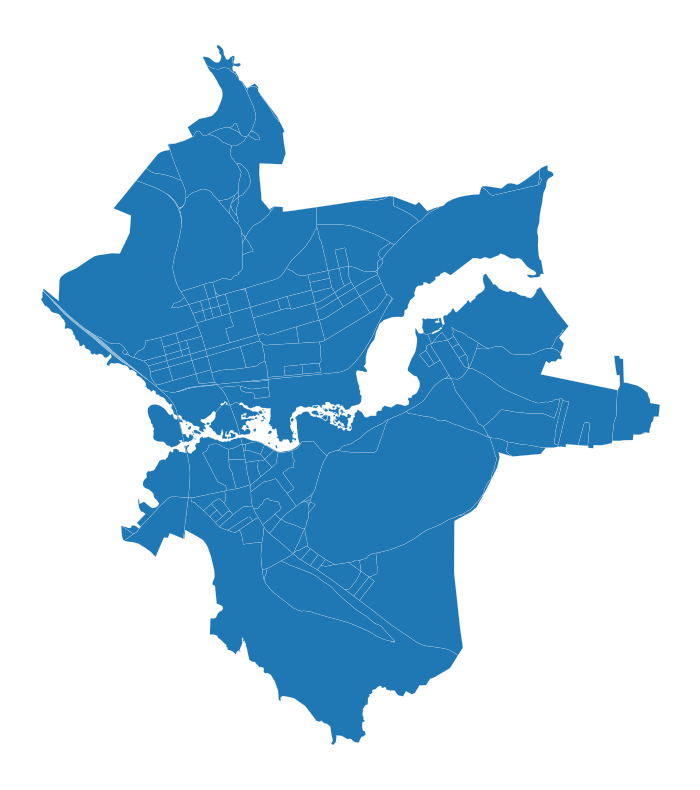

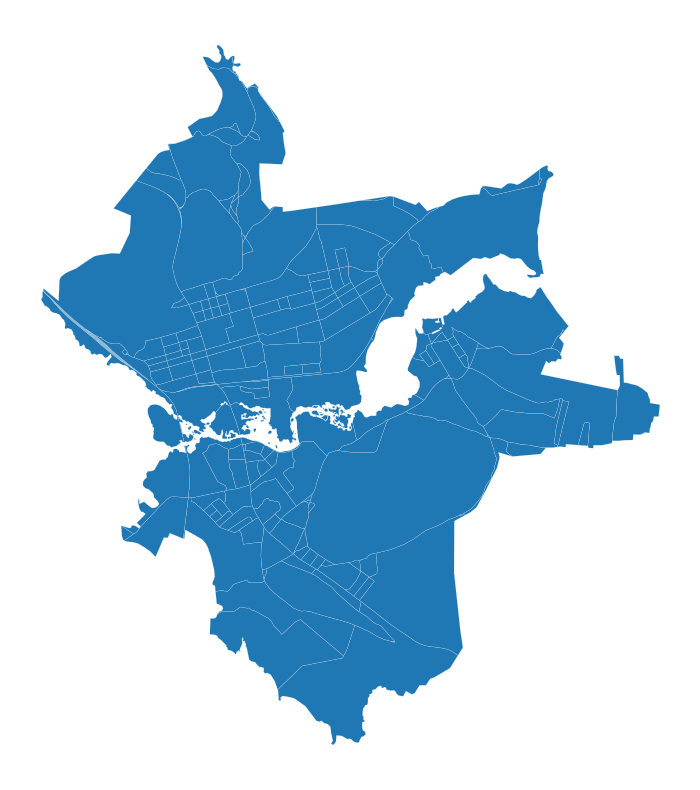

In [ ]:
blocks.plot(linewidth=0.1, figsize=(10,10)).set_axis_off()
splitted_blocks.plot(linewidth=0.1, figsize=(10,10)).set_axis_off()

In [ ]:
splitted_blocks.explore()

Сохраняем те или иные кварталы в файл и скачиваем их себе :)

In [ ]:
splitted_blocks.to_file('priozersk_blocks.geojson')